## 10. Solve Equations

[Data Science Playlist on YouTube](https://www.youtube.com/watch?v=c40z75JnT44&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy)
[![Python Data Science](https://apmonitor.com/che263/uploads/Begin_Python/DataScience10.png)](https://www.youtube.com/watch?v=c40z75JnT44&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy "Python Data Science")

Equations are at the root of data science. It is what turns data into actionable information by developing mathematical expressions that mimic physical systems. Some math expressions are simple and can be calculated sequentially such as

$x=1 \quad y=x^2+2x-4$

The solution is $x=1$ and $y=1+2-4=-1$. Consider the case where $x$ also depends on $y$.

$x=y \quad y=x^2+2x-4$

There are two solutions that are calculated from the quadratic formula $y=\frac{-b\pm\sqrt{b^2-4ac}}{2a}$.

$0=y^2+(2y-y)-4 \quad y^2+y-4 = 0$ with $a=1$, $b=1$ and $c=-4$.

$y = \frac{-1 \pm \sqrt{17}}{2} = {1.56,-2.56}$

There are two primary ways to solve this problem. The first method is a **numeric solution** where the computer uses trial and error methods to get to a solution. Numeric methods are best when the number of equations is large and there is no analytic solution. The second method is a **symbolic solution** that produces an exact solution.

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Numeric Solution

Large-scale and complex problems require a numeric solution approach such as with `fsolve` or `gekko`. It requires a function that returns the equation error residual. This residual is $f(y)=y^2+y-4$ and is not equal to zero when the value of $y$ is not at the correct solution. An initial guess of `1` or `-2` give a different solution because we are starting close to one or the other.

#### Solution with Scipy fsolve

In [2]:
from scipy.optimize import fsolve
def f(y):
    return y**2+y-4
z = fsolve(f,1); print(z)
z = fsolve(f,-2); print(z)

[1.56155281]
[-2.56155281]


![gekko](https://apmonitor.com/che263/uploads/Begin_Python/gekko.png)

**Solution with Python Gekko**

In [3]:
from gekko import GEKKO
m = GEKKO(remote=False)
y = m.Var(1); m.Equation(y**2+y-4==0)
m.solve(disp=False); print(y.value)
y.value = -2
m.solve(disp=False); print(y.value)

[1.5615543876]
[-2.5615543876]


![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Solve 2 Equations

It is similar when there are two equations instead of one.

$y=x^2+2x-4$

$x=y$

The function returns the error residual for each equation as a list. Two initial guesses are needed. This same method extends to more equations as well. Equation solvers can find solutions to problems with thousands or millions of variables.

**Solution with Scipy fsolve**

In [4]:
from scipy.optimize import fsolve
def f(z):
    x,y = z
    return [x-y,y-x**2-2*x+4]
z = fsolve(f,[1,1]); print(z)
z = fsolve(f,[-2,-2]); print(z)

[1.56155281 1.56155281]
[-2.56155281 -2.56155281]


![gekko](https://apmonitor.com/che263/uploads/Begin_Python/gekko.png)

**Solution with Python Gekko**

In [5]:
m = GEKKO(remote=False)
x=m.Var(); y = m.Var(1);
m.Equations([y==x**2+2*x-4, x==y])
m.solve(disp=False)
print(x.value, y.value)

x.value=-2; y.value=-2
m.solve(disp=False)
print(x.value, y.value)

[1.5615533585] [1.5615533585]
[-2.5615543876] [-2.5615543876]


![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Solve 3 Equations

$x^2+y^2+z^2=1$

$x-2y+3z=0.5$

$x+y+z=0$

Solve the problem with 3 variables and 3 equations.

In [7]:
def f(a):
    x,y,z = a
    e1 = x**2 + y**2 + z**2 -1
    e2 = x - 2*y + 3*z - 0.5
    e3 = x+y+z
    return [e1,e2,e3]

x,y,z = fsolve(f, [1,1,1])
print(x,y,z)

-0.7899049747193226 0.21596198988772902 0.5739429848315937


![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Symbolic Solution

Small problems may have an analytic solution that can be expressed symbolically. A symbolic math package in Python is `sympy`. The `display` function is also available to print the equations in Jupyter notebooks. It requires the import `from IPython.display import display`.

In [8]:
from IPython.display import display
import sympy as sym
x = sym.Symbol('x')
y = sym.Symbol('y')
ans = sym.nonlinsolve([x-y, y-x**2-2*x+4], [x,y])
display(ans)

FiniteSet((-1/2 + sqrt(17)/2, -1/2 + sqrt(17)/2), (-sqrt(17)/2 - 1/2, -sqrt(17)/2 - 1/2))

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Solve 3 Equations Symbolically

$x\,y\,z=0$

$x\,y=0$

$x+5\,y+z$

Solve the problem with 3 variables and 3 equations symbolically. The problem is degenerate (underspecified) so one of the variables will appear in the solution because there are an infinite set.

In [10]:
x = sym.Symbol('x')
y = sym.Symbol('y')
z = sym.Symbol('z')
ans = sym.nonlinsolve([x*y*z, x*y, x+5*y + z], [x,y,z])
display(ans)

FiniteSet((0, -z/5, z), (-z, 0, z))

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Linear Equations

Linear equations are also solved in Python but have efficient methods such as `x = np.linalg.solve(A,b)` to solve $A x = b$ equations with matrix $A$ and vectors $x$ and $b$.

$A = \begin{bmatrix}3 & 2\\ 1 & 2 \end{bmatrix} \quad b = \begin{bmatrix}1 \\ 0 \end{bmatrix}$

In [11]:
import numpy as np
A = np.array([[3,2],[1,2]])
b = np.array([1,0])

x = np.linalg.solve(A,b)
print(x)

[ 0.5  -0.25]


A symbolic solution to this set of linear equations is also available using the `sympy` `linsolve` function. If the problem is linear then `linsolve` is preferred because it is more efficient than `nonlinsolve` but it can solve both.

In [12]:
import sympy as sym
x, y = sym.symbols('x y')
ans = sym.linsolve([3*x + 2*y - 1, x + 2*y], (x, y))
sym.pprint(ans)

{(1/2, -1/4)}


![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Optimization

When there are more variables than equations, the problem is underspecified and can't be solved with an equation solver such as `fsolve` (for linear or nonlinear) or `linalg.solve` (just for linear problems). Additional information is needed to guide the selection of the extra variables. An objective function $J(x)$ is one way to specify the problem so that a unique solution exists. The objective is to minimize $x_1 x_4 \left(x_1 + x_2 + x_3\right) + x_3$. The two equations guide the selection of two variables with inequality $\left(x_1 x_2 x_3 x_4 \ge 25\right)$ and equality $\left(x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40\right)$ constraints. All four variables must be between `1` (lower bound) and `5` (upper bound).

$\quad \min x_1 x_4 \left(x_1 + x_2 + x_3\right) + x_3$

$\quad \mathrm{s.t.} \quad x_1 x_2 x_3 x_4 \ge 25$

$\quad x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40$

$\quad 1\le x_1, x_2, x_3, x_4 \le 5$

with initial guess:

$\quad x_0 = (1,5,5,1)$

Additional information on optimization is given in the [Design Optimization Course](https://apmonitor.com/me575) and in the [Design Optimization Book](https://apmonitor.com/me575/index.php/Main/BookChapters). The first solution method is with `scipy.optimize.minimize`. Solvers in this package work well for moderate sized problems with black box models where an objective function is available through a function call.

In [13]:
import numpy as np
from scipy.optimize import minimize

def objective(x):
    return x[0]*x[3]*(x[0]+x[1]+x[2])+x[2]

def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x):
    sum_eq = 40.0
    for i in range(4):
        sum_eq = sum_eq - x[i]**2
    return sum_eq

# initial guesses
n = 4
x0 = np.zeros(n)
x0[0] = 1.0
x0[1] = 5.0
x0[2] = 5.0
x0[3] = 1.0

# optimize
b = (1.0,5.0)
bnds = (b, b, b, b)
con1 = {'type': 'ineq', 'fun': constraint1} 
con2 = {'type': 'eq', 'fun': constraint2}
cons = ([con1,con2])
solution = minimize(objective,x0,method='SLSQP',\
                    bounds=bnds,constraints=cons)
x = solution.x

# show final objective
print('Final Objective: ' + str(objective(x)))

# print solution
print('Solution')
print('x1 = ' + str(x[0]))
print('x2 = ' + str(x[1]))
print('x3 = ' + str(x[2]))
print('x4 = ' + str(x[3]))

Final Objective: 17.01401724563517
Solution
x1 = 1.0
x2 = 4.742996096883977
x3 = 3.8211546234095715
x4 = 1.379407645075325


![gekko](https://apmonitor.com/che263/uploads/Begin_Python/gekko.png)

### Optimization with Gekko

[Python Gekko](https://gekko.readthedocs.io/en/latest/) also solves the problem and uses automatic differentiation and gradient-based solvers such as `APOPT` or `IPOPT` to find a solution. This solution method is better for large-scale problems. [Additional tutorials on Gekko](https://apmonitor.com/wiki/index.php/Main/GekkoPythonOptimization) show how to solve other types of optimization problems.

In [14]:
from gekko import GEKKO
m = GEKKO(remote=False)

# initialize variables
x1,x2,x3,x4 = [m.Var(lb=1, ub=5) for i in range(4)]

# initial values
x1.value = 1
x2.value = 5
x3.value = 5
x4.value = 1

# Equations
m.Equation(x1*x2*x3*x4>=25)
m.Equation(x1**2+x2**2+x3**2+x4**2==40)

# Objective
m.Obj(x1*x4*(x1+x2+x3)+x3)

# Solve
m.solve(disp=False)

# Final objective
print('Final Objective: ' + str(m.options.objfcnval))

# Print solution
print('Solution')
print('x1: ' + str(x1.value))
print('x2: ' + str(x2.value))
print('x3: ' + str(x3.value))
print('x4: ' + str(x4.value))

Final Objective: 17.014017289
Solution
x1: [1.0]
x2: [4.742999637]
x3: [3.8211499845]
x4: [1.3794082931]


### TCLab Activity

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Data Collection

![connections](https://apmonitor.com/che263/uploads/Begin_Python/connections.png)

Turn on heater 1 to 100% and record $T_1$ every 10 seconds for 3 minutes. The data should include a total of 19 data points for each temperature sensor and the recording time, starting at zero. Make a note of the temperature points at 0, 90, and 180 seconds.

In [6]:
import tclab
import time
import numpy as np

n=19
tm = np.linspace(0,180,19)
T1 = []
T2 = []
with tclab.TCLab() as lab:
    lab.Q1(100)
    for i in range(n):
        T1.append(lab.T1)
        T2.append(lab.T2)
        time.sleep(10)


TCLab version 0.4.9
Arduino Leonardo connected on port /dev/ttyACM1 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
TCLab disconnected successfully.


In [7]:
print(tm[0],tm[9],tm[18])
print(T1[0],T1[9],T1[18])
print(T2[0],T2[9],T2[18])

0.0 90.0 180.0
55.381 67.627 78.906
39.944 38.043 40.879


![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Linear Equations

Three points are required to specify a quadratic polynomial of the form $y =a_0 + a_1 \; x + a_2 \; x^2$. Create a quadratic regression of $T_2$ by using only the first, middle, and last data points. Suppose these were the following data points for $T_2$:

| Time (sec) | Temperature (°C)  |
|------|------|
| 0    | 23.0 |
| 90    | 33.0 |
| 180    | 43.0 |

Solve the linear regression as a set of three equations that are derived by plugging in the three data points to the polynomial equation to create three separate equations with $y=T_2$ and $x=time$.

$\quad a_0 + a_1 \; 0 + a_2 \; 0^2 = 23.0$

$\quad a_0 + a_1 \; 90 + a_2 \; 90^2 = 33.0$

$\quad a_0 + a_1 \; 180 + a_2 \; 180^2 = 43.0$

In matrix form, the set of linear equations become: 

$\quad \begin{bmatrix}1 & 0 & 0 \\ 1 & 90 & 90^2 \\ 1 & 180 & 180^2 \end{bmatrix}\begin{bmatrix}a_0\\a_1\\a_2\end{bmatrix} = \begin{bmatrix}23.0\\33.0\\43.0\end{bmatrix}$

Solve this set of equations for the quadratic parameters $a_0$, $a_1$, and $a_2$ with the data collected at the beginning of the TCLab activity. Plot the quadratic fit with the data to ensure that the curve goes through the three specified data points.

[39.944 38.043 40.879]


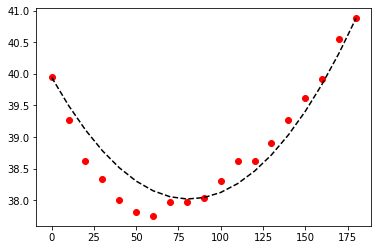

In [8]:
import matplotlib.pyplot as plt
M = np.array([[1,0,0],[1,90,90**2],[1,180,180**2]])

b = np.array([T2[0],T2[9], T2[18]])
# b = np.array([23,33,43])
print(b)

a = np.flip(np.linalg.solve(M,b))


plt.plot(tm, T2, 'ro')
plt.plot(tm,np.polyval(a, tm), 'k--')

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Nonlinear Equations

Fit the $T_1$ data to a nonlinear correlation using only three data points.

$\quad T_1 = a + b \exp{(c \, time)}$

Three points are required to uniquely specify a model with three parameters. When there are more than the minimum required number of points, a least squares regression is typically performed to minimize the squared error between the measured and predicted values. For this exercise, use only 3 points (first, middle, last) of the $T_1$ data. Suppose these were the following data points for $T_1$:

| Time (sec) | Temperature (°C)  |
|------|------|
| 0    | 22.0 |
| 90    | 42.0 |
| 180    | 52.0 |

Solve for the three parameters from the three equations that exactly intersect the required data points.

$\quad 22.0 = a + b \exp{(c \, 0)}$

$\quad 42.0 = a + b \exp{(c \, 90.3)}$

$\quad 52.0 = a + b \exp{(c \, 180.5)}$

Solve this set of equations for the unknown parameters $a$, $b$, and $c$ with the data collected at the beginning of this notebook. Use guess values of $a=100$, $b=-100$, and $c=-0.01$. Plot the nonlinear fit with the data to ensure that the curve goes through the three specified data points. Add appropriate labels to the plot.

In [10]:
from scipy.optimize import fsolve
def f(z):
    a,b,c = z
    return [T1[i] - a -b*np.exp(c*tm[i]) for i in [0,9,18]]

a,b,c = fsolve(f, [1,1,1])
print(a,b,c)

55.381 2.0494423312009295e-18 1.0000000000089497
